# ÌÉêÏÉâÏ†Å Î∂ÑÏÑù (EDA)

### Ìå®ÌÇ§ÏßÄ import

In [1]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn
#!pip install xlrd
#!pip install openpyxl

In [2]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import plot, show, legend, title, xlabel, ylabel
import seaborn as sns
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings('ignore')

### Í≤ΩÎ°ú ÏÑ§Ï†ï

In [3]:
os.chdir(r'C:\Users\Administrator\Desktop\Íµ¨Ïä¨Í∏∞github\global_keyword_trend_innisfree data')

### Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [4]:
googletrend = pd.read_excel('google_trend.xlsx', sheet_name = 'fin')
sales = pd.read_excel('sales.xlsx', sheet_name = 'fin')

In [5]:
sales.shape
sales.sort_values(by=['year_quarter']).head(5)

year_quarter  year  quarter  sales  sales(-china)
0        201001  2010        1    851         646.76
1        201002  2010        2    703         534.28
2        201003  2010        3    474         360.24
3        201004  2010        4   1310         995.60
4        201101  2011        1   2054        1478.88

## Google Trend Îç∞Ïù¥ÌÑ∞

https://trends.google.co.kr
<br>Íµ¨Í∏Ä Ìä∏Î†åÎìú Î∂ÑÏÑùÏùÑ ÌÜµÌï¥ÏÑú Ïò®ÎùºÏù∏ ÏÉÅÏóêÏÑúÏùò Í≤ÄÏÉâÎüâÏù¥ Îß§Ï∂úÏóê ÎØ∏ÏπòÎäî ÏòÅÌñ•Î†•ÏùÑ ÌôïÏù∏ÌïòÏòÄÏäµÎãàÎã§.

### Í∑∏ÎûòÌîÑ

In [6]:
# year_month Î≥ÄÏàò ÏÉùÏÑ±.
x = []
for i in range(googletrend.shape[0]):
    x.append(datetime(googletrend['year'][i],googletrend['month'][i],1))
googletrend['x_year_month'] = x

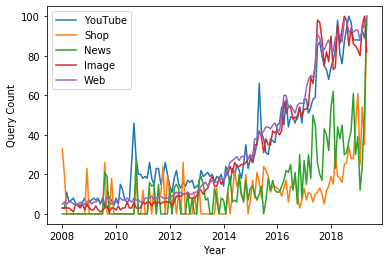

In [7]:
# ÏõîÎ≥Ñ ÎÖ∏Ï∂ú
plot(googletrend['x_year_month'],googletrend['yt_query'])
plot(googletrend['x_year_month'],googletrend['shop_query'])
plot(googletrend['x_year_month'],googletrend['news_query'])
plot(googletrend['x_year_month'],googletrend['image_query'])
plot(googletrend['x_year_month'],googletrend['web_query'])
legend(['YouTube','Shop','News', 'Image','Web'])
xlabel('Year')
ylabel('Query Count')
plt.show()

ÏãúÍ∞ÑÏùò ÌùêÎ¶ÑÏóê Îî∞Îùº Í≤ÄÏÉâÎüâÍ≥º Îß§Ï∂úÏù¥ Î™®Îëê Ï¶ùÍ∞ÄÌïòÎäî Ï∂îÏÑ∏Í∞Ä ÎÇòÌÉÄÎÇ¨ÏäµÎãàÎã§.

### ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ

In [8]:
colnames = googletrend.columns
colnames

Index(['year_month', 'year', 'month', 'yt_query', 'shop_query', 'news_query',
       'image_query', 'web_query', 'x_year_month'],
      dtype='object')

In [9]:
# ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í≥ÑÏÇ∞ÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî Î≥ÄÌôîÏú®Î°ú Î≥ÄÌôò
googletrend_small = googletrend[['yt_query','shop_query','news_query','image_query','web_query']]
nRows = googletrend_small.shape[0]
googletrend_small_m = googletrend_small.iloc[0:nRows-1,]
googletrend_small_p = googletrend_small.iloc[1:nRows,] 
googletrend_small_p.index = np.arange(nRows-1)
googletrend_small_rate = np.log((googletrend_small_p+1)/(googletrend_small_m+1))

In [10]:
corr_data = googletrend_small_rate.corr(method = 'pearson')
np.round(corr_data,2)

yt_query  shop_query  news_query  image_query  web_query
yt_query         1.00       -0.15        0.00        -0.05       0.15
shop_query      -0.15        1.00        0.33         0.16      -0.19
news_query       0.00        0.33        1.00         0.13       0.00
image_query     -0.05        0.16        0.13         1.00       0.24
web_query        0.15       -0.19        0.00         0.24       1.00

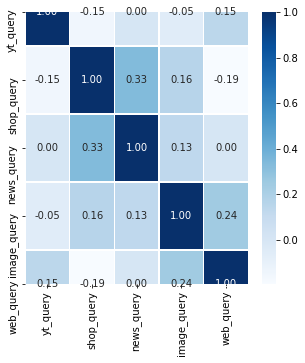

In [11]:
plt.figure(figsize = (5,5))
sns.heatmap(data = corr_data, annot=True, fmt = '.2f', linewidths=.5, cmap = 'Blues')
plt.show()

## Google Trend + Îß§Ï∂úÎç∞Ïù¥ÌÑ∞

### Îç∞Ïù¥ÌÑ∞ Ìï©ÏπòÍ∏∞

In [12]:
# Î∂ÑÍ∏∞Î°ú Î≥ÄÌôò.
quarter = []
for i in range(googletrend.shape[0]):
    if googletrend['month'][i] == 1 :
        quarter.append(1)
    elif googletrend['month'][i] == 2 :
        quarter.append(1)   
    elif googletrend['month'][i] == 3 :
        quarter.append(1)
    elif googletrend['month'][i] == 4 :
        quarter.append(2)
    elif googletrend['month'][i] == 5 :
        quarter.append(2)
    elif googletrend['month'][i] == 6 :
        quarter.append(2)
    elif googletrend['month'][i] == 7 :
        quarter.append(3)
    elif googletrend['month'][i] == 8 :
        quarter.append(3)
    elif googletrend['month'][i] == 9 :
        quarter.append(3)
    elif googletrend['month'][i] == 10 :
        quarter.append(4)
    elif googletrend['month'][i] == 11 :
        quarter.append(4)
    elif googletrend['month'][i] == 12 :
        quarter.append(4)
googletrend['quarter'] = quarter

In [13]:
# Î∂ÑÍ∏∞Î≥Ñ Ìï©Í≥Ñ Í≥ÑÏÇ∞.
google_quarter = googletrend.groupby(['year', 'quarter']).sum()              
google_quarter =google_quarter.drop(columns = ['year_month','month'])           # Î∂àÌïÑÏöî Ïª¨Îüº ÏÇ≠Ï†ú.
google_quarter.reset_index(inplace=True)                                        # Multi-index Ìï¥Ï†ú.
google_quarter

year  quarter  yt_query  shop_query  news_query  image_query  web_query
0   2008        1        17          52           0            9         16
1   2008        2        21           0           0            6         17
2   2008        3        14           0           0           12         16
3   2008        4        18          23           0           12         16
4   2009        1        21           0           0            7         18
5   2009        2        20           0           0            7         19
6   2009        3        23          26          40            9         21
7   2009        4        19          18           0            7         17
8   2010        1        28           0           0            8         21
9   2010        2        25           0           0           12         22
10  2010        3        79           0           0           12         21
11  2010        4        68          18          28            9         20
12  2011        1        55          12           0           17         22
13  2011        2        59          26          45           16         24
14  2011        3        61          20          15           16         26
15  2011        4        65          43           0           18         24
16  2012        1        43          21          26           16         27
17  2012        2        50          11          28           27         32
18  2012        3        47          26          11           31         31
19  2012        4        46          10           8           24         31
20  2013        1        51          15          36           33         37
21  2013        2        60           0          30           35         45
22  2013        3        55           0          13           50         49
23  2013        4        57          13          15           47         51
24  2014        1        59          11          19           57         60
25  2014        2        57          32          32           71         81
26  2014        3        65          41          36           73         85
27  2014        4        83          28          30           79         88
28  2015        1        84          32          37           90         97
29  2015        2       143          45          31          116        120
30  2015        3        99          65          25          104        130
31  2015        4       111          39          41          118        134
32  2016        1       145          34          36          124        135
33  2016        2       147          36          60          162        174
34  2016        3       144          46          58          151        159
35  2016        4       150          20          43          151        167
36  2017        1       167          31          72          161        188
37  2017        2       171          26         113          210        214
38  2017        3       252          34          63          283        264
39  2017        4       216          31         115          234        257
40  2018        1       235          65         139          237        255
41  2018        2       255          53         127          275        269
42  2018        3       281          85          98          283        288
43  2018        4       273         101         133          265        278
44  2019        1       269         140          75          258        274
45  2019        2       185         135         151          182        196

In [14]:
# Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ Î≥ëÌï©.
google_and_sales = pd.merge(sales, google_quarter,how='inner',on=['year','quarter'])  # Inner joinÏúºÎ°ú Î≥ëÌï©.
google_and_sales = google_and_sales.drop(columns=['year_quarter'])
google_and_sales.head(8)

year  quarter  sales  sales(-china)  yt_query  shop_query  news_query  \
0  2010        1    851         646.76        28           0           0   
1  2010        2    703         534.28        25           0           0   
2  2010        3    474         360.24        79           0           0   
3  2010        4   1310         995.60        68          18          28   
4  2011        1   2054        1478.88        55          12           0   
5  2011        2    980         705.60        59          26          45   
6  2011        3    617         444.24        61          20          15   
7  2011        4    857         617.04        65          43           0   

   image_query  web_query  
0            8         21  
1           12         22  
2           12         21  
3            9         20  
4           17         22  
5           16         24  
6           16         26  
7           18         24

### Î∂ÑÍ∏∞Î≥Ñ Í∑∏ÎûòÌîÑ

#### Îß§Ï∂úÍ≥º ÎÖ∏Ï∂ú Ï∂îÏù¥ (Ï†àÎåÄ ÏàòÏπò)

In [15]:
nRows = google_and_sales.shape[0]
x = []
for i in range(nRows):
    if google_and_sales['quarter'][i] == 1 :
        x.append(datetime(google_and_sales['year'][i],3,1))               # 1Î∂ÑÍ∏∞ => 3Ïõî 1Ïùº.
    elif google_and_sales['quarter'][i] == 2 :
        x.append(datetime(google_and_sales['year'][i],6,1))               # 2Î∂ÑÍ∏∞ => 6Ïõî 1Ïùº.
    elif google_and_sales['quarter'][i] == 3 :
        x.append(datetime(google_and_sales['year'][i],9,1))               # 3Î∂ÑÍ∏∞ => 9Ïõî 1Ïùº.
    elif google_and_sales['quarter'][i] == 4 :
        x.append(datetime(google_and_sales['year'][i],12,1))              # 4Î∂ÑÍ∏∞ => 12Ïõî 1Ïùº.
google_and_sales['x_year_month'] = x
google_and_sales.head(5)

year  quarter  sales  sales(-china)  yt_query  shop_query  news_query  \
0  2010        1    851         646.76        28           0           0   
1  2010        2    703         534.28        25           0           0   
2  2010        3    474         360.24        79           0           0   
3  2010        4   1310         995.60        68          18          28   
4  2011        1   2054        1478.88        55          12           0   

   image_query  web_query x_year_month  
0            8         21   2010-03-01  
1           12         22   2010-06-01  
2           12         21   2010-09-01  
3            9         20   2010-12-01  
4           17         22   2011-03-01

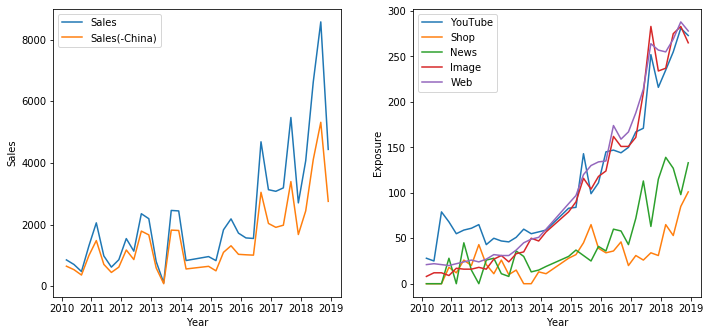

In [16]:
fig = plt.figure(figsize=(10,4))
axes1 = fig.add_axes([0,0,0.4,1])
axes2 = fig.add_axes([0.5,0,0.4,1])
axes1.plot(google_and_sales['x_year_month'],google_and_sales['sales'])
axes1.plot(google_and_sales['x_year_month'],google_and_sales['sales(-china)'])
axes1.legend(['Sales','Sales(-China)'])
axes1.set_xlabel('Year')
axes1.set_ylabel('Sales')
axes2.plot(google_and_sales['x_year_month'],google_and_sales['yt_query'])
axes2.plot(google_and_sales['x_year_month'],google_and_sales['shop_query'])
axes2.plot(google_and_sales['x_year_month'],google_and_sales['news_query'])
axes2.plot(google_and_sales['x_year_month'],google_and_sales['image_query'])
axes2.plot(google_and_sales['x_year_month'],google_and_sales['web_query'])
axes2.legend(['YouTube','Shop','News','Image','Web'])
axes2.set_xlabel('Year')
axes2.set_ylabel('Exposure')
plt.show()

#### Îß§Ï∂úÍ≥º ÎÖ∏Ï∂ú Ï∂îÏù¥ (ÏµúÎåÄÍ∞í ÎåÄÎπÑ ÎπÑÏú®)

In [17]:
# ÏµúÎåÄÍ∞í ÎåÄÎπÑ ÎπÑÏú®Î°ú Î≥ÄÌôò.
ratio_sales = []
ratio_china = []
ratio_yt = []
ratio_shop =[]
ratio_news = []
ratio_image = []
ratio_web =[]
for i in range(nRows):
    ratio_sales.append((google_and_sales['sales'][i]/max(google_and_sales['sales']))*100)
    ratio_china.append((google_and_sales['sales(-china)'][i]/max(google_and_sales['sales(-china)']))*100)
    ratio_yt.append((google_and_sales['yt_query'][i]/max(google_and_sales['yt_query']))*100)
    ratio_shop.append((google_and_sales['shop_query'][i]/max(google_and_sales['shop_query']))*100)
    ratio_news.append((google_and_sales['news_query'][i]/max(google_and_sales['news_query']))*100)
    ratio_image.append((google_and_sales['image_query'][i]/max(google_and_sales['image_query']))*100)
    ratio_web.append((google_and_sales['web_query'][i]/max(google_and_sales['web_query']))*100)
google_and_sales['ratio_sales'] = ratio_sales
google_and_sales['ratio_sales(-china)'] = ratio_china
google_and_sales['ratio_yt'] = ratio_yt
google_and_sales['ratio_shop'] = ratio_shop
google_and_sales['ratio_news'] = ratio_news
google_and_sales['ratio_image'] = ratio_image
google_and_sales['ratio_web'] = ratio_web
google_and_sales = google_and_sales[google_and_sales['year']!=2019]

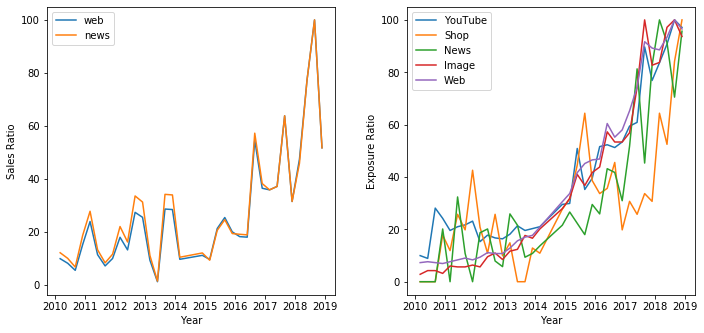

In [18]:
fig = plt.figure(figsize=(10,4))
axes1 = fig.add_axes([0,0,0.4,1])
axes2 = fig.add_axes([0.5,0,0.4,1])
axes1.plot(google_and_sales['x_year_month'],google_and_sales['ratio_sales'])
axes1.plot(google_and_sales['x_year_month'],google_and_sales['ratio_sales(-china)'])
axes1.legend(['web', 'news','youtube','image','shop','sales','sales(-china)'])
axes1.set_xlabel('Year')
axes1.set_ylabel('Sales Ratio')
axes2.plot(google_and_sales['x_year_month'],google_and_sales['ratio_yt'])
axes2.plot(google_and_sales['x_year_month'],google_and_sales['ratio_shop'])
axes2.plot(google_and_sales['x_year_month'],google_and_sales['ratio_news'])
axes2.plot(google_and_sales['x_year_month'],google_and_sales['ratio_image'])
axes2.plot(google_and_sales['x_year_month'],google_and_sales['ratio_web'])
axes2.legend(['YouTube','Shop','News','Image','Web'])
axes2.set_xlabel('Year')
axes2.set_ylabel('Exposure Ratio')
plt.show()

#### YouTube >> Îß§Ï∂ú

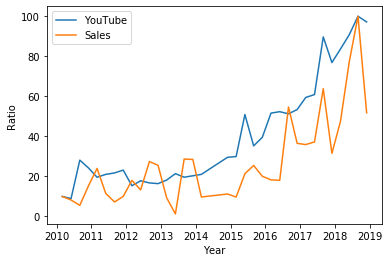

In [19]:
# ratio_salesÏôÄ ratio_chinaÎäî ÎßéÏù¥ Í≤πÏπòÎØÄÎ°ú ratio_china ÏãúÍ∞ÅÌôîÎäî Ïä§ÌÇµÌï®.
plot(google_and_sales['x_year_month'],google_and_sales['ratio_yt'])
plot(google_and_sales['x_year_month'],google_and_sales['ratio_sales'])
legend(['YouTube','Sales'])
xlabel('Year')
ylabel('Ratio')
plt.show()

#### Shop >> Îß§Ï∂ú

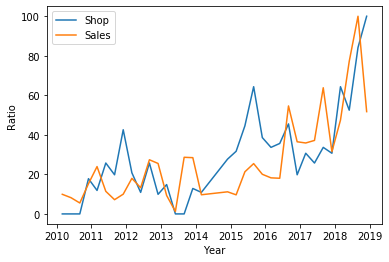

In [20]:
# ratio_salesÏôÄ ratio_chinaÎäî ÎßéÏù¥ Í≤πÏπòÎØÄÎ°ú ratio_china ÏãúÍ∞ÅÌôîÎäî Ïä§ÌÇµÌï®.
plot(google_and_sales['x_year_month'],google_and_sales['ratio_shop'])
plot(google_and_sales['x_year_month'],google_and_sales['ratio_sales'])
legend(['Shop','Sales'])
xlabel('Year')
ylabel('Ratio')
plt.show()

#### News >> Îß§Ï∂ú

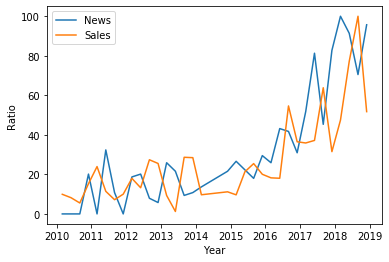

In [21]:
# ratio_salesÏôÄ ratio_chinaÎäî ÎßéÏù¥ Í≤πÏπòÎØÄÎ°ú ratio_china ÏãúÍ∞ÅÌôîÎäî Ïä§ÌÇµÌï®.
plot(google_and_sales['x_year_month'],google_and_sales['ratio_news'])
plot(google_and_sales['x_year_month'],google_and_sales['ratio_sales'])
legend(['News','Sales'])
xlabel('Year')
ylabel('Ratio')
plt.show()

#### Image >> Îß§Ï∂ú

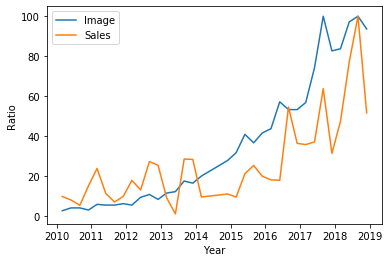

In [22]:
# ratio_salesÏôÄ ratio_chinaÎäî ÎßéÏù¥ Í≤πÏπòÎØÄÎ°ú ratio_china ÏãúÍ∞ÅÌôîÎäî Ïä§ÌÇµÌï®.
plot(google_and_sales['x_year_month'],google_and_sales['ratio_image'])
plot(google_and_sales['x_year_month'],google_and_sales['ratio_sales'])
legend(['Image','Sales'])
xlabel('Year')
ylabel('Ratio')
plt.show()

#### Web >> Îß§Ï∂ú

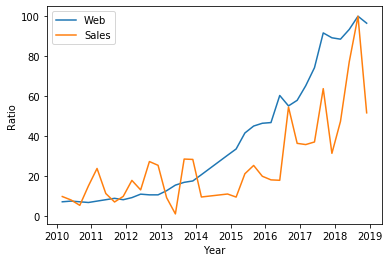

In [23]:
# ratio_salesÏôÄ ratio_chinaÎäî ÎßéÏù¥ Í≤πÏπòÎØÄÎ°ú ratio_china ÏãúÍ∞ÅÌôîÎäî Ïä§ÌÇµÌï®.
plot(google_and_sales['x_year_month'],google_and_sales['ratio_web'])
plot(google_and_sales['x_year_month'],google_and_sales['ratio_sales'])
legend(['Web','Sales'])
xlabel('Year')
ylabel('Ratio')
plt.show()

### Îß§Ï∂úÍ≥º ÎÖ∏Ï∂ú ÏÇ¨Ïù¥Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ

In [24]:
google_and_sales.columns

Index(['year', 'quarter', 'sales', 'sales(-china)', 'yt_query', 'shop_query',
       'news_query', 'image_query', 'web_query', 'x_year_month', 'ratio_sales',
       'ratio_sales(-china)', 'ratio_yt', 'ratio_shop', 'ratio_news',
       'ratio_image', 'ratio_web'],
      dtype='object')

In [25]:
# Îç∞Ïù¥ÌÑ∞ Í∞ÑÏ∂îÎ¶¨Í∏∞
drop_list=['year','quarter','x_year_month','ratio_sales','ratio_sales(-china)']
drop_list += ['ratio_yt','ratio_shop','ratio_news','ratio_image','ratio_web']
google_and_sales_small=google_and_sales.drop(columns=drop_list)
google_and_sales_small.head(5)

sales  sales(-china)  yt_query  shop_query  news_query  image_query  \
0    851         646.76        28           0           0            8   
1    703         534.28        25           0           0           12   
2    474         360.24        79           0           0           12   
3   1310         995.60        68          18          28            9   
4   2054        1478.88        55          12           0           17   

   web_query  
0         21  
1         22  
2         21  
3         20  
4         22

In [26]:
# ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í≥ÑÏÇ∞ÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî Î≥ÄÌôîÏú®Ïù¥ ÌïÑÏöîÌïòÎã§.
nRows = google_and_sales_small.shape[0]
google_and_sales_small_m = google_and_sales_small.iloc[0:nRows-1,]
google_and_sales_small_p = google_and_sales_small.iloc[1:nRows,] 
google_and_sales_small_p.index = np.arange(nRows-1)
google_and_sales_small_rate = np.log((google_and_sales_small_p+1)/(google_and_sales_small_m+1))

In [27]:
corr_data = google_and_sales_small_rate.corr(method = 'pearson')
np.round(corr_data,2)

sales  sales(-china)  yt_query  shop_query  news_query  \
sales           1.00           1.00     -0.16        0.37       -0.14   
sales(-china)   1.00           1.00     -0.15        0.37       -0.13   
yt_query       -0.16          -0.15      1.00       -0.04       -0.11   
shop_query      0.37           0.37     -0.04        1.00        0.24   
news_query     -0.14          -0.13     -0.11        0.24        1.00   
image_query     0.13           0.12      0.15       -0.20       -0.43   
web_query      -0.15          -0.16      0.14       -0.21        0.09   

               image_query  web_query  
sales                 0.13      -0.15  
sales(-china)         0.12      -0.16  
yt_query              0.15       0.14  
shop_query           -0.20      -0.21  
news_query           -0.43       0.09  
image_query           1.00       0.55  
web_query             0.55       1.00

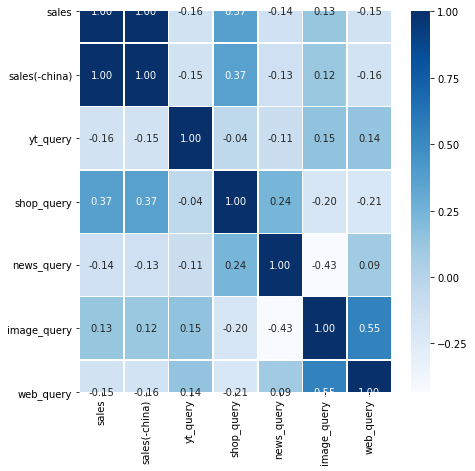

In [28]:
plt.figure(figsize = (7,7))
sns.heatmap(data = corr_data, annot=True, fmt = '.2f', linewidths=.5, cmap = 'Blues')
plt.show()

In [29]:
# ÏãúÏ∞® ÏÉÅÍ¥ÄÍ≥ÑÏàò: YouTubeÏôÄ Sales
nRows = google_and_sales_small_rate.shape[0]
for d in range(5):
    ser_sales = google_and_sales_small_rate['sales'][d:nRows]
    ser_yt = google_and_sales_small_rate['yt_query'][0:nRows-d]
    corr_val = np.round(ser_sales.corr(ser_yt),2)
    print("Correlation with time difference " + str(d) + " is " + str(corr_val))

Correlation with time difference 0 is -0.16
Correlation with time difference 1 is -0.18
Correlation with time difference 2 is -0.15
Correlation with time difference 3 is -0.13
Correlation with time difference 4 is -0.11


In [30]:
# 2015ÎÖÑÎèÑ Ïù¥ÌõÑÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò.
google_and_sales_short_rate = google_and_sales_small_rate.iloc[17:,]
corr_data = google_and_sales_short_rate.corr(method = 'pearson')
np.round(corr_data,2)

sales  sales(-china)  yt_query  shop_query  news_query  \
sales           1.00           1.00      0.38        0.46       -0.50   
sales(-china)   1.00           1.00      0.39        0.43       -0.52   
yt_query        0.38           0.39      1.00        0.05       -0.35   
shop_query      0.46           0.43      0.05        1.00       -0.08   
news_query     -0.50          -0.52     -0.35       -0.08        1.00   
image_query     0.33           0.33      0.66       -0.06       -0.11   
web_query       0.18           0.16      0.42        0.09       -0.12   

               image_query  web_query  
sales                 0.33       0.18  
sales(-china)         0.33       0.16  
yt_query              0.66       0.42  
shop_query           -0.06       0.09  
news_query           -0.11      -0.12  
image_query           1.00       0.81  
web_query             0.81       1.00

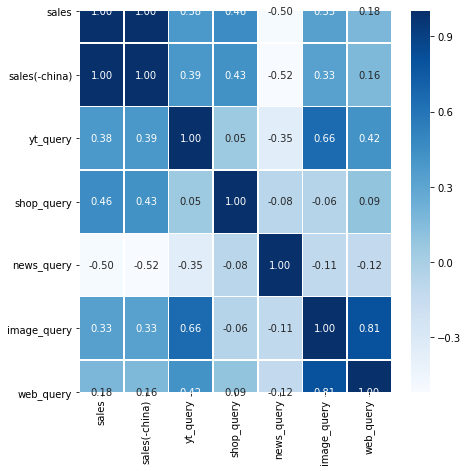

In [31]:
plt.figure(figsize = (7,7))
sns.heatmap(data = corr_data, annot=True, fmt = '.2f', linewidths=.5, cmap = 'Blues')
plt.show()

2015ÎÖÑÎèÑ Ïù¥ÌõÑ YouTube Ï°∞ÌöåÏàòÏôÄ Sales ÏÇ¨Ïù¥Ïùò ÏñëÏùò ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏!!!

## YouTube Î∂ÑÏÑù

### Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [32]:
yt = pd.read_csv('youtube_video.csv', header = 'infer', encoding = 'UTF-8')
yt_comment = pd.read_csv('youtube_comments.csv', header = 'infer', encoding = 'UTF-8')

### YouTube Ï†ïÎüâÏ†Å Î∂ÑÏÑù

#### ÎèôÏòÅÏÉÅ Ïàò

In [33]:
yt.shape

(661, 8)

#### View (Ï°∞ÌöåÏàò) Ï†ÑÏ≤òÎ¶¨

In [34]:
nRows = yt.shape[0]
drop_list = ['Ï°∞ÌöåÏàò','Ìöå',',']
drop_string='|'.join(drop_list)
for i in range(nRows):
    yt['view'][i] = re.sub(drop_string,'',yt['view'][i])
yt['view'] = pd.to_numeric(yt['view'])

#### Date (Í≤åÏãúÏùº) Ï†ÑÏ≤òÎ¶¨

In [35]:
# ÎÖÑ / ÏõîÎ°ú Ï™ºÍ∞úÍ∏∞.
x = []
year = []
month = []
drop_list = ['Í≤åÏãúÏùº: ','ÏµúÏ¥à Í≥µÍ∞ú: ','\s',':']
drop_string='|'.join(drop_list)
for i in range(nRows):
    yt['date'][i] = re.sub(drop_string,'',yt['date'][i])
    yt['date'][i] = re.sub('Ïã§ÏãúÍ∞ÑÏä§Ìä∏Î¶¨Î∞çÏãúÏûëÏùº','',yt['date'][i])
    x = yt['date'][i].split('.')
    year.append(x[0])
    month.append(x[1])
yt['year'] = year
yt['month'] = month
yt['year'] = pd.to_numeric(yt['year'])
yt['month'] = pd.to_numeric(yt['month'])
yt = yt.drop(columns=['date'])

In [36]:
yt.shape
yt.sort_values(by=['year','month']).head(5)

link  \
53   https://www.youtube.com/watch?v=d3aq49eygaU   
1    https://www.youtube.com/watch?v=1xn7rjlOxfc   
594  https://www.youtube.com/watch?v=oyfB_fvnJ2g   
156  https://www.youtube.com/watch?v=-A5hbpB94LA   
254  https://www.youtube.com/watch?v=bGPIhN1Z9GA   

                                       title     view  good  bad  \
53                 Song Hye Kyo Innisfree CF     2936    15    1   
1            Celtic Woman - Isle of Inisfree  2134965  4.9Ï≤ú  112   
594                    The Isle Of Innisfree   558583  1.2Ï≤ú   69   
156  The Isle of Innisfree - Maureen Hegarty    72372   146    2   
254               The Lake Isle Of Innisfree     5173     7    2   

                                           description number of comment  \
53                           Song hye Kyo innisfree CF             ÎåìÍ∏Ä 1Í∞ú   
1    Purchase Info and Tour Dates: http://www.celti...           ÎåìÍ∏Ä 512Í∞ú   
594  The Isle Of Innisfree by The Dublin City Rambl...           ÎåìÍ∏Ä 112Í∞ú   
156  'The Isle of Innisfree' - Words & Music by Dic...            ÎåìÍ∏Ä 93Í∞ú   
254  Words by William Butler Yeats. Read by our fri...             ÎåìÍ∏Ä 1Í∞ú   

     year  month  
53   2007      1  
1    2007      5  
594  2007      5  
156  2007     11  
254  2008      4

In [37]:
# Î∂ÑÍ∏∞Î°ú Î≥ÄÌôò.
quarter = []
a=[1,2,3]
b=[4,5,6]
c=[7,8,9]
for i in range(yt.shape[0]):
    if yt['month'][i] in a :
        quarter.append(1)
    elif yt['month'][i] in b :
        quarter.append(2)
    elif yt['month'][i] in c :
        quarter.append(3)
    else:
        quarter.append(4)
yt['quarter'] = quarter

#### Good (Ï¢ãÏïÑÏöî) Ï†ÑÏ≤òÎ¶¨

In [38]:
goodnum = []
for i in range(nRows):
    if yt['good'][i][-1] == 'Ï≤ú' :
        goodnum.append(int(float(yt['good'][i][:-1])*1000))
    elif yt['good'][i][-1] == 'Îßå' :
        goodnum.append(int(float(yt['good'][i][:-1])*10000))
    elif yt['good'][i] == 'Ï¢ãÏïÑÏöî' :
        goodnum.append(0)
    else :
        goodnum.append(int(yt['good'][i]))
yt['good'] = goodnum

#### Bad (Ïã´Ïñ¥Ïöî) Ï†ÑÏ≤òÎ¶¨

In [39]:
drop_string = 'Ïã´Ïñ¥Ïöî'
bad = yt['bad']
for i in range(nRows):
    try:
        bad[i] = re.sub(drop_string, '0', bad[i])
        if yt['bad'][i][-1] == 'Ï≤ú' :
            bad[i]= (int(float(yt['bad'][i][:-1])*1000))
        elif yt['bad'][i][-1] == 'Îßå' :
            bad[i]=  (int(float(yt['bad'][i][:-1])*10000))
    except:
        pass
yt['bad'] = pd.to_numeric(yt['bad'])

#### Good ÎπÑÏú® ÌååÏÉùÎ≥ÄÏàò

In [40]:
good_ratio = yt['good']/(yt['good']+yt['bad'])
good_ratio = good_ratio.fillna(0)
yt['good_ratio'] = good_ratio

#### Number fo comment (ÎåìÍ∏ÄÏàò) Ï†ÑÏ≤òÎ¶¨

In [41]:
drop_list = ['ÎåìÍ∏Ä','Í∞ú',',','\s']
drop_string='|'.join(drop_list)
num_com = yt['number of comment']
for i in range(nRows):
    num_com[i] = re.sub(drop_string, '', num_com[i])
yt['number of comment'] = pd.to_numeric(num_com)

#### Îã§ÏñëÌïú ÌÜµÍ≥ÑÏπò Í≥ÑÏÇ∞

In [42]:
print("Ï°∞ÌöåÏàò ÎàÑÏ†Å : " + str(yt['view'].sum()))
print("Ï°∞ÌöåÏàò ÌèâÍ∑† : " + str(int(yt['view'].mean())))
print("Ï°∞ÌöåÏàò Ï§ëÏúÑ : " + str(int(yt['view'].median())))
print('-'*30)
print("ÎåìÍ∏ÄÏàò ÎàÑÏ†Å : " + str(yt['number of comment'].sum()))
print("ÎåìÍ∏ÄÏàò ÌèâÍ∑† : " + str(int(yt['number of comment'].mean())))
print("ÎåìÍ∏ÄÏàò Ï§ëÏúÑ : " + str(int(yt['number of comment'].median())))
print('-'*30)
print("Good ÎπÑÏú® ÌèâÍ∑† : " + str(np.round(yt['good_ratio'].mean(),2)))
print("Good ÎπÑÏú® Ï§ëÏúÑ : " + str(np.round(yt['good_ratio'].median(),2)))

Ï°∞ÌöåÏàò ÎàÑÏ†Å : 105482735
Ï°∞ÌöåÏàò ÌèâÍ∑† : 159580
Ï°∞ÌöåÏàò Ï§ëÏúÑ : 31433
------------------------------
ÎåìÍ∏ÄÏàò ÎàÑÏ†Å : 117856
ÎåìÍ∏ÄÏàò ÌèâÍ∑† : 178
ÎåìÍ∏ÄÏàò Ï§ëÏúÑ : 41
------------------------------
Good ÎπÑÏú® ÌèâÍ∑† : 0.92
Good ÎπÑÏú® Ï§ëÏúÑ : 0.97


#### Î∂ÑÍ∏∞Î≥Ñ ÎèôÏòÅÏÉÅ Í∞úÏàò

In [43]:
# Î≥ÑÎèÑÏùò Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏúºÎ°ú ÎßåÎì†Îã§.
# Ïπ¥Ïö¥Ìä∏Í∞Ä 0Ïù¥Ïñ¥ÎèÑ ÌëúÏãú.
video_count = []
for i in range(2007,2020):
    for j in range(1,5):
        x = yt.loc[yt['year'] == i][yt['quarter'] == j]['link'].count()
        video_count.append([i , j , x])
video_count = pd.DataFrame(video_count)
video_count.rename(columns = {0:'year',1:'quarter', 2:'video_count'},inplace = True)
video_count.head(10)

year  quarter  video_count
0  2007        1            1
1  2007        2            2
2  2007        3            0
3  2007        4            1
4  2008        1            0
5  2008        2            2
6  2008        3            2
7  2008        4            1
8  2009        1            1
9  2009        2            3

#### ÎèôÏòÅÏÉÅ Í∞úÏàòÏôÄ Îß§Ï∂ú Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©

In [44]:
video_and_sales = pd.merge(sales, video_count, how = 'inner', on=['year','quarter'])
video_and_sales.head(10)

year_quarter  year  quarter  sales  sales(-china)  video_count
0        201001  2010        1    851         646.76            5
1        201002  2010        2    703         534.28            0
2        201003  2010        3    474         360.24            4
3        201004  2010        4   1310         995.60            1
4        201101  2011        1   2054        1478.88            1
5        201102  2011        2    980         705.60            2
6        201103  2011        3    617         444.24            2
7        201104  2011        4    857         617.04            4
8        201201  2012        1   1543        1172.68            2
9        201202  2012        2   1135         862.60            5

### YouTube Ï†ïÏÑ±Ï†Å Î∂ÑÏÑù

#### ÎåìÍ∏Ä date Ï†ÑÏ≤òÎ¶¨ : ÎπàÏπ∏ Î∞è Î∂àÌïÑÏöîÌïú Î¨∏Ïûê ÏßÄÏö∞Í∏∞

In [45]:
# date Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
nRows = yt_comment.shape[0]
drop_list = ['Ï†Ñ','ÏàòÏ†ïÎê®','[()]','\s']
drop_string='|'.join(drop_list)
for i in range(nRows):
    yt_comment['date'][i] = re.sub(drop_string,'',yt_comment['date'][i])

#### [ÌôïÏù∏ ÌïÑÏöî] ÎåìÍ∏Ä comment date(video date) Ï†ÑÏ≤òÎ¶¨ : ÎπàÏπ∏ Î∞è Î∂àÌïÑÏöîÌïú Î¨∏Ïûê ÏßÄÏö∞Í∏∞

In [46]:
# comment date Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
comment_date = []
drop_list = ['Í≤åÏãúÏùº:','ÏµúÏ¥àÍ≥µÍ∞ú:','Ïã§ÏãúÍ∞ÑÏä§Ìä∏Î¶¨Î∞çÏãúÏûëÏùº:','ÏàòÏ†ïÎê®','[()]','\s']
drop_string='|'.join(drop_list)
for i in range(nRows):
    yt_comment['comment date'][i] = re.sub(drop_string,'',yt_comment['comment date'][i])
comment_date = []
for i in range(nRows):
    yt_comment['comment date'][i] = re.sub(drop_string,'',yt_comment['comment date'][i])

In [47]:
x = []
comment_date = []
for i in range(nRows) :
    x = yt_comment['comment date'][i].split('.')
    comment_date.append(datetime(int(x[0]),int(x[1]),int(x[2])))
yt_comment['comment date'] = comment_date

#### ÎåìÍ∏Ä date ÎÖÑ/Ïõî/ÏùºÏóê Îî∞Îùº ÎÇ†Ïßú ÏßÄÏ†ï

In [48]:
comment_date = []
for i in range(nRows) :
    if yt_comment['date'][i][-1] == 'Ï¥à' :
        comment_date.append(relativedelta(days = 0))
    elif yt_comment['date'][i][-1] == 'Î∂Ñ' :
        comment_date.append(relativedelta(days = 0))
    elif yt_comment['date'][i][-1] == 'Í∞Ñ' :
        comment_date.append(relativedelta(days = 0))
    elif yt_comment['date'][i][-1] == 'Ïùº' :
        comment_date.append(relativedelta(days = int(yt_comment['date'][i][:-1])))
    elif yt_comment['date'][i][-1] == 'Ï£º' :
        comment_date.append(relativedelta(weeks = int(yt_comment['date'][i][:-1])))
    elif yt_comment['date'][i][-1] == 'Ïõî' :
        comment_date.append(relativedelta(weeks = int(yt_comment['date'][i][:-2])*4))
    elif yt_comment['date'][i][-1] == 'ÎÖÑ' :
        comment_date.append(relativedelta(years = int(yt_comment['date'][i][:-1])))
#comment_date

In [49]:
# ÏãúÍ∞Ñ Ï∞®Ïù¥Î•º Í∏∞Î°ùÌï®.
collected_date = datetime(2019,5,15)                     # Í∏∞Ï§Ä ÏùºÏûê
in_date = []
for i in range(len(comment_date)):
    in_date.append(collected_date - comment_date[i])
yt_comment['date'] = in_date                            # data Î≥ÄÏàò ÎåÄÏ≤¥

In [50]:
# comment dateÎ≥¥Îã§ dateÍ∞Ä ÏïûÏù∏ Í≤ΩÏö∞, comment dateÎ°ú ÏàòÏ†ï
change_date = []
for i in range(nRows) :
    if yt_comment['date'][i] - yt_comment['comment date'][i] < timedelta(days = 0) :
        change_date.append(yt_comment['comment date'][i])
    else :
        change_date.append(yt_comment['date'][i])     
yt_comment['date'] = change_date

#### ÎÖÑ, ÏõîÎ°ú Î≥ÄÌôò

In [51]:
x = []
year = []
month = []
for i in range(len(yt_comment['date'])):
    x = str(yt_comment['date'][i]).split('-')
    year.append(x[0])
    month.append(x[1])
yt_comment['year'] = pd.to_numeric(year)            # ÏàòÏπòÌòïÏúºÎ°ú Î≥ÄÌôò Ìè¨Ìï®!
yt_comment['month'] = pd.to_numeric(month)          # ÏàòÏπòÌòïÏúºÎ°ú Î≥ÄÌôò Ìè¨Ìï®!
yt_comment = yt_comment.drop(columns=['date'])                   # Ïù¥Ï†úÎäî Ï§ëÎ≥µÏ†ÅÏù¥ÎØÄÎ°ú Ï†úÍ±∞!

In [52]:
yt_comment.shape
yt_comment.sort_values(by=['year','month'])

link  \
3621   https://www.youtube.com/watch?v=d3aq49eygaU   
417    https://www.youtube.com/watch?v=1xn7rjlOxfc   
418    https://www.youtube.com/watch?v=1xn7rjlOxfc   
419    https://www.youtube.com/watch?v=1xn7rjlOxfc   
420    https://www.youtube.com/watch?v=1xn7rjlOxfc   
421    https://www.youtube.com/watch?v=1xn7rjlOxfc   
422    https://www.youtube.com/watch?v=1xn7rjlOxfc   
423    https://www.youtube.com/watch?v=1xn7rjlOxfc   
424    https://www.youtube.com/watch?v=1xn7rjlOxfc   
425    https://www.youtube.com/watch?v=1xn7rjlOxfc   
426    https://www.youtube.com/watch?v=1xn7rjlOxfc   
427    https://www.youtube.com/watch?v=1xn7rjlOxfc   
428    https://www.youtube.com/watch?v=1xn7rjlOxfc   
429    https://www.youtube.com/watch?v=1xn7rjlOxfc   
430    https://www.youtube.com/watch?v=1xn7rjlOxfc   
431    https://www.youtube.com/watch?v=1xn7rjlOxfc   
432    https://www.youtube.com/watch?v=1xn7rjlOxfc   
433    https://www.youtube.com/watch?v=1xn7rjlOxfc   
434    https://www.youtube.com/watch?v=1xn7rjlOxfc   
435    https://www.youtube.com/watch?v=1xn7rjlOxfc   
436    https://www.youtube.com/watch?v=1xn7rjlOxfc   
437    https://www.youtube.com/watch?v=1xn7rjlOxfc   
438    https://www.youtube.com/watch?v=1xn7rjlOxfc   
439    https://www.youtube.com/watch?v=1xn7rjlOxfc   
440    https://www.youtube.com/watch?v=1xn7rjlOxfc   
441    https://www.youtube.com/watch?v=1xn7rjlOxfc   
442    https://www.youtube.com/watch?v=1xn7rjlOxfc   
9300   https://www.youtube.com/watch?v=-A5hbpB94LA   
9301   https://www.youtube.com/watch?v=-A5hbpB94LA   
9302   https://www.youtube.com/watch?v=-A5hbpB94LA   
...                                            ...   
46154  https://www.youtube.com/watch?v=Z-j-7S0tLAw   
46155  https://www.youtube.com/watch?v=Z-j-7S0tLAw   
46156  https://www.youtube.com/watch?v=Z-j-7S0tLAw   
46157  https://www.youtube.com/watch?v=Z-j-7S0tLAw   
46158  https://www.youtube.com/watch?v=Z-j-7S0tLAw   
46159  https://www.youtube.com/watch?v=Z-j-7S0tLAw   
46160  https://www.youtube.com/watch?v=Z-j-7S0tLAw   
46161  https://www.youtube.com/watch?v=Z-j-7S0tLAw   
46162  https://www.youtube.com/watch?v=Z-j-7S0tLAw   
46163  https://www.youtube.com/watch?v=Z-j-7S0tLAw   
46164  https://www.youtube.com/watch?v=Z-j-7S0tLAw   
46165  https://www.youtube.com/watch?v=Z-j-7S0tLAw   
46232  https://www.youtube.com/watch?v=qKB5Bw98luk   
46233  https://www.youtube.com/watch?v=qKB5Bw98luk   
46234  https://www.youtube.com/watch?v=qKB5Bw98luk   
46235  https://www.youtube.com/watch?v=qKB5Bw98luk   
46236  https://www.youtube.com/watch?v=qKB5Bw98luk   
46237  https://www.youtube.com/watch?v=qKB5Bw98luk   
46238  https://www.youtube.com/watch?v=qKB5Bw98luk   
46595  https://www.youtube.com/watch?v=kOFDz0IlfOI   
46892  https://www.youtube.com/watch?v=BNrWr317CPg   
46895  https://www.youtube.com/watch?v=BNrWr317CPg   
46898  https://www.youtube.com/watch?v=BNrWr317CPg   
46903  https://www.youtube.com/watch?v=BNrWr317CPg   
46917  https://www.youtube.com/watch?v=BNrWr317CPg   
46918  https://www.youtube.com/watch?v=BNrWr317CPg   
46953  https://www.youtube.com/watch?v=BNrWr317CPg   
46956  https://www.youtube.com/watch?v=BNrWr317CPg   
46960  https://www.youtube.com/watch?v=BNrWr317CPg   
46968  https://www.youtube.com/watch?v=BNrWr317CPg   

                                                 comment comment date  year  \
3621                                     i think so too.   2007-01-31  2007   
417    Well, I must tell you, that when I have had en...   2007-05-22  2008   
418    i love the tune, i listen to this song everyda...   2007-05-22  2008   
419                             As do the rest of us. =/   2007-05-22  2008   
420            It might be. Perhaps I'll try it one day.   2007-05-22  2008   
421                                            BEAUTIFUL   2007-05-22  2008   
422    But then it always sounds as if a man would be...   2007-05-22  2008   
423    Well I am a Contra alto. That¬¥s pretty bad, be...   2007-

#### Î∂ÑÍ∏∞Î°ú Î≥ÄÌôò

In [53]:
quarter = []
for i in range(nRows):
    if yt_comment['month'][i] == 1 :
        quarter.append(1)
    elif yt_comment['month'][i] == 2 :
        quarter.append(1)   
    elif yt_comment['month'][i] == 3 :
        quarter.append(1)
    elif yt_comment['month'][i] == 4 :
        quarter.append(2)
    elif yt_comment['month'][i] == 5 :
        quarter.append(2)
    elif yt_comment['month'][i] == 6 :
        quarter.append(2)
    elif yt_comment['month'][i] == 7 :
        quarter.append(3)
    elif yt_comment['month'][i] == 8 :
        quarter.append(3)
    elif yt_comment['month'][i] == 9 :
        quarter.append(3)
    elif yt_comment['month'][i] == 10 :
        quarter.append(4)
    elif yt_comment['month'][i] == 11 :
        quarter.append(4)
    elif yt_comment['month'][i] == 12 :
        quarter.append(4)
yt_comment['quarter'] = quarter

#### Î∂ÑÍ∏∞Î≥Ñ ÎåìÍ∏Ä Í∞úÏàò

In [54]:
# Î≥ÑÎèÑÏùò Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏúºÎ°ú ÎßåÎì†Îã§.
# Ïπ¥Ïö¥Ìä∏Í∞Ä 0Ïù¥Ïñ¥ÎèÑ ÌëúÏãú.
comment_count = []
for i in range(2010,2020):
    for j in range(1,5):
        x = yt_comment.loc[yt_comment['year'] == i][yt_comment['quarter'] == j]['link'].count()
        comment_count.append([i , j , x])
comment_count = pd.DataFrame(comment_count)
comment_count.rename(columns = {0:'year',1:'quarter', 2:'comment_count'},inplace = True)
comment_count.head(10)

year  quarter  comment_count
0  2010        1              0
1  2010        2            133
2  2010        3              0
3  2010        4              0
4  2011        1              0
5  2011        2            252
6  2011        3              0
7  2011        4              0
8  2012        1              0
9  2012        2            389

#### ÎèôÏòÅÏÉÅ Í∞úÏàò, ÎåìÍ∏Ä Í∞úÏàò, Îß§Ï∂ú Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©

In [55]:
comment_video_and_sales = pd.merge(video_and_sales, comment_count, how = 'inner', on=['year','quarter'])
comment_video_and_sales.head(10)

year_quarter  year  quarter  sales  sales(-china)  video_count  \
0        201001  2010        1    851         646.76            5   
1        201002  2010        2    703         534.28            0   
2        201003  2010        3    474         360.24            4   
3        201004  2010        4   1310         995.60            1   
4        201101  2011        1   2054        1478.88            1   
5        201102  2011        2    980         705.60            2   
6        201103  2011        3    617         444.24            2   
7        201104  2011        4    857         617.04            4   
8        201201  2012        1   1543        1172.68            2   
9        201202  2012        2   1135         862.60            5   

   comment_count  
0              0  
1            133  
2              0  
3              0  
4              0  
5            252  
6              0  
7              0  
8              0  
9            389

## Twitter Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù

### Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [56]:
tweets = pd.read_csv('tweets.csv', header = 'infer', encoding = 'UTF-8')
tweets.columns = ['tweets','date','id']

In [57]:
tweets

tweets           date  \
0     20190503\r\nÏó¨ÏûêÏπúÍµ¨ GFRIEND / ÏÜåÏõê Sowon & ÏòàÎ¶∞ Yerin...          5Ïõî 6Ïùº   
1     190513 Innisfree WEIBO Ï£ºÏ†ïÌåÖ\r\n\r\n\r\n\r\n#Ï£ºÏ†ïÌåÖ...         5Ïõî 13Ïùº   
2                  Í≥†Í∞ùÎãò+Íµ≠ÌîÑÎãòÎì§Ïù¥ ÎØ∏ÏÑ∏Î®ºÏßÄÏÜçÏóêÏÑúÎèÑ ÏõÉÏúºÏÖ®ÏúºÎ©¥ Ìï¥ÏÑúÎçî ÎÖ∏Î†•ÌïòÍ≤†ÏäµÎãàÎã§          5Ïõî 4Ïùº   
3               Ïó∞Ïù∏Ïù¥ÎÇò ÏïÑÏ£º Í∞ÄÍπåÏö¥ ÏπúÍµ¨ÎùºÎèÑ Íµ≥Ïù¥ Ïïå ÌïÑÏöîÍ∞Ä ÏóÜÎäî Í±¥ Ïïà ÎßêÌï¥ÎèÑ ÎêúÎã§             1Ïùº   
4                                                 Í∑ÄÏó¨Ïõå„Öú„Öú             1Ïùº   
5     ÏõåÎÑàÏõê ÍµøÏ¶à ÏòπÏÑ±Ïö∞ Í∞ïÎã§ÎãàÏóò ÏñëÎèÑ\r\n#ÏõåÎÑàÏõêÍµøÏ¶à\r\n\r\nWANNAONE G...             1Ïùº   
6                                   Ïò§Îπ†Í∞Ä Ïö©Îèà Ï§å Îä¶ÏùÄ ÏÉùÏùºÏÑ†Î¨ºÏù¥ÎùºÍµ¨             2Ïùº   
7     Ïò§ÌéÄ Î∏îÎûôÏùÄ Ïä§ÌÜ†Î¶¨,ÏÑ∏Í≥ÑÍ¥Ä, Ï∫êÎ¶≠ÌÑ∞, Í¥ÄÍ≥Ñ Ï†ÑÎ≥µ, ÌÖêÏÖò Îì±Îì± Îã§ ÌõåÎ•≠ÌïòÏßÄÎßå ÌäπÌûàÎÇò ...             2Ïùº   
8     Ïã§Î†•Ïù¥ ÏóÜÏúºÎ©¥ Ï∞©ÌïòÍ∏∞ÎùºÎèÑ ÌïòÎçòÍ∞Ä, ÎààÏπòÎùºÎèÑ ÏûàÎçòÍ∞Ä,,,Ïñ¥ÎîîÏÑú Î∞ò ÏÑ∏Í∏∞ÎèÑ Îçî Îêú Ïù¥Î°†...         5Ïõî 13Ïùº   
9     Ïó∞Ìï©ÎèôÏïÑÎ¶¨ÏóêÏÑú ÎÇòÏù¥ ÎßéÍ≥† ÏûêÏ°¥Ïã¨ Ïéà ÏûêÏπ≠ ^Í≥†ÌïôÎ†• ÎÇ®ÏÑ±^Ïù∏ Ïö¥ÏòÅÏúÑÏõêÏù¥ ÎÇòÌïúÌÖå\r\n...         5Ïõî 13Ïùº   
10                                   ÎåúÍ∏∞ ÎÇòÎëê„Öú„ÖúÏö∞Î¶¨ Ïò¨ÎßàÎßåÏù¥Ïïº Ï¶ùÎßê         5Ïõî 13Ïùº   
11                                   Ï£ºÏù∏Í≥µÎì§ Ïã†Î≥Ä ÏúÑÌóòÌïú ÏñòÍ∏∞Í∞Ä Ï∑®Ìñ•         5Ïõî 13Ïùº   
12    Ìïú Îã¨ Î®πÍ≤å ÎßàÎùº Î™ª Î®πÏóàÏñ¥...ÎåÄÏã† 4ÌÇ§Î°ú Í∞êÎüâÌñàÏßÄÎßå....Îã¥Ï£º ÏπòÌåÖ Îïå Î®πÏüà Í∑∏...         5Ïõî 12Ïùº   
13                           ÏòÅÌôî Î≥¥Í∏∞ Ï†ÑÏóê ÏÑ§ÌÉï Î∫Ä ÌÇ§ÏúÑÏ•¨Ïä§ Ìïú Ïûî ÎßàÏÖ®Ïúº         5Ïõî 12Ïùº   
14                       Ï†ÄÎ≤àÏóê Îß§Ïùº Ïö∞Ïú† ÏÜåÌîÑÌä∏ÏΩò Î®πÏñ¥Î¥§ÎäîÎç∞ Îã¥Î∞±ÌïòÍ≥† ÎßõÏûàÏóàÎã§         5Ïõî 12Ïùº   
15                        ÏßÑÏßúÏöî? ÏóâÏóâ„Öú„ÖúÏãúÏÇ¨Ìöå ÌïòÎ©¥ Íº≠ Î≥¥Îü¨ Í∞ÄÏïºÍ≤†ÎÑ§Ïöî„Öú„Öú„Öú         5Ïõî 12Ïùº   
16                                     Ïã±Í∞ÄÌè¥ÏóêÏÑú Ìã¥ÎçîÎ°ú Í∏â Ïò§ÌîÑÌï†Íπå         5Ïõî 11Ïùº   
17    ÎèôÏïÑÎ¶¨ÏóêÏÑú Î∂ÄÏõêÎì§Ïù¥ ÏùòÍ≤¨ Ï∞®Ïù¥ ÎïúÏóê Ïã∏Ïõ†Ïúº. ÎëòÏù¥ ÎèÑÏ†ÄÌûà ÌÉÄÌòë Î™ªÌï¥ÏÑú ÎÇ¥Í∞Ä Ï§ëÏû¨Ìï¥Ï§¨...         5Ïõî 10Ïùº   
18    [5/9 RT Ïù¥Î≤§Ìä∏ ÎãπÏ≤®Ïûê Î∞úÌëú]\r\nÏ∂ïÌïòÌï©ÎãàÎã§!\r\n @W927__ Îãò, @...         5Ïõî 10Ïùº   
19                                       ÌôîÏÇ∞ÏÜ°Ïù¥Î°ú Íπ®ÎÅóÌäúÎ∏å ÌñÑÌäúÎ∏å         5Ïõî 10Ïùº   
20    ÏõåÎÑàÏõê ÍµøÏ¶à ÏòπÏÑ±Ïö∞ Í∞ïÎã§ÎãàÏóò ÏñëÎèÑ\r\n#ÏõåÎÑàÏõêÍµøÏ¶à\r\n\r\nWANNAONE G...             2Ïùº   
21             Ïò§ÌéÄÎ∏îÎûô Ïù¥Ìï¥Í¥ÄÍ≥ÑÍ∞Ä Í≥ÑÏÜç Ï†ÑÎ≥µÎêòÏñ¥ÏÑú Ïû¨Î∞åÏúº Ïã¨Ïû• Ï´ÑÍπÉÌï¥ÏßÄÎäî Í∏∞Î∂Ñ Ïß± Ï°∞ÏïÑ         5Ïõî 13Ïùº   
22                                               Ïî¨ÎÇ®!!!!         5Ïõî 13Ïùº   
23                                                  Ï∂ïÌïòÌï¥         5Ïõî 13Ïùº   
24                          „Öú„ÖúÏòÅÌôîÍ¥Ä ÎÇòÏò§Î©¥ÏÑú ÎùºÎØ∏ÎûÄ ÏôÑÏãù!!!!!Ïô∏Ïπ†  Îªî         5Ïõî 12Ïùº   
25    ÏóÑÎßàÍ∞Ä ÎßàÏπ¥Ïò§ÏóêÏÑú ÏãúÍ≥Ñ ÏÇ¨ÏôîÏúº Ï§ëÏÑ∏ ÏãúÎåÄÏóê Ï∞∞ Í≤É Í∞ôÏùÄ ÎîîÏûêÏù∏...Í∞ôÏïòÏßÄÎßå Í≥†ÎßôÎã§Í≥†...         5Ïõî 12Ïùº   
26                                          2,3,6Ïù¥ Ï†§ Ìé∏Ìï¥         5Ïõî 11Ïùº   
27                ÎÑ§? ÌôîÎ©¥ÏóêÏÑúÎèÑ Í∏∞Ï†àÌï† Í≤É Í∞ôÏùÄÎç∞ Ïã§Ï†úÎ°† Îçî ÍµâÏû•ÌïòÎã§Íµ¨Ïöî???„Öú„Öú„Öú         5Ïõî 11Ïùº   
28                                      ÏùºÏ∞ç Ïû§ÎçîÎãà ÏÉàÎ≤ΩÏóê Íπ®Î≤ÑÎ†∏ÎÑ§         5Ïõî 11Ïùº   
29    Í∑∏Îü¨Î©¥ ÏÉùÍ∞ÅÏßÄÎèÑ Î™ªÌïú ÌíçÍ≤ΩÏùÑ Î≥¥Í≤å ÎèºÏÑú Ï¢ãÏïÑÏöî! Ìù¨Ìù¨ ÎÑ§ Ïó¨Ïú†Î°≠Í≤å Î≥¥ÎÇ¥Í≥† ÏûàÎãµÎãàÎã§ ...         5Ïõî 11Ïùº   
...                                                 ...            ...   
7075  Yoona's beautiful CF for Innisfree http://bit....   2009ÎÖÑ 9Ïõî 25Ïùº   
7076  On Set with Yoona for Innisfree: Innisfree is ...   2009ÎÖÑ 9Ïõî 21Ïùº   
7077  @susancohan on your way back from the NE Garde...   2009ÎÖÑ 9Ïõî 12Ïùº   
7078  And one last one on a homesick evening...Yeats...    2009ÎÖÑ 7Ïõî 4Ïùº   
7079  I shall arise and go now, and go to Innisfree....   2009ÎÖÑ 3Ïõî 26Ïùº   
7080  WB Yeat

### ÏûëÏÑ±ÎÇ†Ïßú Ï†ÑÏ≤òÎ¶¨

#### Î∂ÑÍ∏∞Î°ú Î≥ÄÍ≤Ω

In [58]:
x = []
check = [] 
for i in range(tweets.shape[0]):
    if len(tweets['date'][i])>=11 :
        x = tweets['date'][i]
        check.append(x)
    elif len(tweets['date'][i])>=5:
        x = '2019ÎÖÑ ' + tweets['date'][i]
        check.append(x)
    else :
        x = tweets['date'][i]
        x = str(16- int(tweets['date'][i].replace('Ïùº', '')))
        x = '2019ÎÖÑ ' + '5Ïõî ' + x + 'Ïùº'
        check.append(x)
tweets['date'] = check

In [59]:
tweets

tweets           date  \
0     20190503\r\nÏó¨ÏûêÏπúÍµ¨ GFRIEND / ÏÜåÏõê Sowon & ÏòàÎ¶∞ Yerin...    2019ÎÖÑ 5Ïõî 6Ïùº   
1     190513 Innisfree WEIBO Ï£ºÏ†ïÌåÖ\r\n\r\n\r\n\r\n#Ï£ºÏ†ïÌåÖ...   2019ÎÖÑ 5Ïõî 13Ïùº   
2                  Í≥†Í∞ùÎãò+Íµ≠ÌîÑÎãòÎì§Ïù¥ ÎØ∏ÏÑ∏Î®ºÏßÄÏÜçÏóêÏÑúÎèÑ ÏõÉÏúºÏÖ®ÏúºÎ©¥ Ìï¥ÏÑúÎçî ÎÖ∏Î†•ÌïòÍ≤†ÏäµÎãàÎã§    2019ÎÖÑ 5Ïõî 4Ïùº   
3               Ïó∞Ïù∏Ïù¥ÎÇò ÏïÑÏ£º Í∞ÄÍπåÏö¥ ÏπúÍµ¨ÎùºÎèÑ Íµ≥Ïù¥ Ïïå ÌïÑÏöîÍ∞Ä ÏóÜÎäî Í±¥ Ïïà ÎßêÌï¥ÎèÑ ÎêúÎã§   2019ÎÖÑ 5Ïõî 15Ïùº   
4                                                 Í∑ÄÏó¨Ïõå„Öú„Öú   2019ÎÖÑ 5Ïõî 15Ïùº   
5     ÏõåÎÑàÏõê ÍµøÏ¶à ÏòπÏÑ±Ïö∞ Í∞ïÎã§ÎãàÏóò ÏñëÎèÑ\r\n#ÏõåÎÑàÏõêÍµøÏ¶à\r\n\r\nWANNAONE G...   2019ÎÖÑ 5Ïõî 15Ïùº   
6                                   Ïò§Îπ†Í∞Ä Ïö©Îèà Ï§å Îä¶ÏùÄ ÏÉùÏùºÏÑ†Î¨ºÏù¥ÎùºÍµ¨   2019ÎÖÑ 5Ïõî 14Ïùº   
7     Ïò§ÌéÄ Î∏îÎûôÏùÄ Ïä§ÌÜ†Î¶¨,ÏÑ∏Í≥ÑÍ¥Ä, Ï∫êÎ¶≠ÌÑ∞, Í¥ÄÍ≥Ñ Ï†ÑÎ≥µ, ÌÖêÏÖò Îì±Îì± Îã§ ÌõåÎ•≠ÌïòÏßÄÎßå ÌäπÌûàÎÇò ...   2019ÎÖÑ 5Ïõî 14Ïùº   
8     Ïã§Î†•Ïù¥ ÏóÜÏúºÎ©¥ Ï∞©ÌïòÍ∏∞ÎùºÎèÑ ÌïòÎçòÍ∞Ä, ÎààÏπòÎùºÎèÑ ÏûàÎçòÍ∞Ä,,,Ïñ¥ÎîîÏÑú Î∞ò ÏÑ∏Í∏∞ÎèÑ Îçî Îêú Ïù¥Î°†...   2019ÎÖÑ 5Ïõî 13Ïùº   
9     Ïó∞Ìï©ÎèôÏïÑÎ¶¨ÏóêÏÑú ÎÇòÏù¥ ÎßéÍ≥† ÏûêÏ°¥Ïã¨ Ïéà ÏûêÏπ≠ ^Í≥†ÌïôÎ†• ÎÇ®ÏÑ±^Ïù∏ Ïö¥ÏòÅÏúÑÏõêÏù¥ ÎÇòÌïúÌÖå\r\n...   2019ÎÖÑ 5Ïõî 13Ïùº   
10                                   ÎåúÍ∏∞ ÎÇòÎëê„Öú„ÖúÏö∞Î¶¨ Ïò¨ÎßàÎßåÏù¥Ïïº Ï¶ùÎßê   2019ÎÖÑ 5Ïõî 13Ïùº   
11                                   Ï£ºÏù∏Í≥µÎì§ Ïã†Î≥Ä ÏúÑÌóòÌïú ÏñòÍ∏∞Í∞Ä Ï∑®Ìñ•   2019ÎÖÑ 5Ïõî 13Ïùº   
12    Ìïú Îã¨ Î®πÍ≤å ÎßàÎùº Î™ª Î®πÏóàÏñ¥...ÎåÄÏã† 4ÌÇ§Î°ú Í∞êÎüâÌñàÏßÄÎßå....Îã¥Ï£º ÏπòÌåÖ Îïå Î®πÏüà Í∑∏...   2019ÎÖÑ 5Ïõî 12Ïùº   
13                           ÏòÅÌôî Î≥¥Í∏∞ Ï†ÑÏóê ÏÑ§ÌÉï Î∫Ä ÌÇ§ÏúÑÏ•¨Ïä§ Ìïú Ïûî ÎßàÏÖ®Ïúº   2019ÎÖÑ 5Ïõî 12Ïùº   
14                       Ï†ÄÎ≤àÏóê Îß§Ïùº Ïö∞Ïú† ÏÜåÌîÑÌä∏ÏΩò Î®πÏñ¥Î¥§ÎäîÎç∞ Îã¥Î∞±ÌïòÍ≥† ÎßõÏûàÏóàÎã§   2019ÎÖÑ 5Ïõî 12Ïùº   
15                        ÏßÑÏßúÏöî? ÏóâÏóâ„Öú„ÖúÏãúÏÇ¨Ìöå ÌïòÎ©¥ Íº≠ Î≥¥Îü¨ Í∞ÄÏïºÍ≤†ÎÑ§Ïöî„Öú„Öú„Öú   2019ÎÖÑ 5Ïõî 12Ïùº   
16                                     Ïã±Í∞ÄÌè¥ÏóêÏÑú Ìã¥ÎçîÎ°ú Í∏â Ïò§ÌîÑÌï†Íπå   2019ÎÖÑ 5Ïõî 11Ïùº   
17    ÎèôÏïÑÎ¶¨ÏóêÏÑú Î∂ÄÏõêÎì§Ïù¥ ÏùòÍ≤¨ Ï∞®Ïù¥ ÎïúÏóê Ïã∏Ïõ†Ïúº. ÎëòÏù¥ ÎèÑÏ†ÄÌûà ÌÉÄÌòë Î™ªÌï¥ÏÑú ÎÇ¥Í∞Ä Ï§ëÏû¨Ìï¥Ï§¨...   2019ÎÖÑ 5Ïõî 10Ïùº   
18    [5/9 RT Ïù¥Î≤§Ìä∏ ÎãπÏ≤®Ïûê Î∞úÌëú]\r\nÏ∂ïÌïòÌï©ÎãàÎã§!\r\n @W927__ Îãò, @...   2019ÎÖÑ 5Ïõî 10Ïùº   
19                                       ÌôîÏÇ∞ÏÜ°Ïù¥Î°ú Íπ®ÎÅóÌäúÎ∏å ÌñÑÌäúÎ∏å   2019ÎÖÑ 5Ïõî 10Ïùº   
20    ÏõåÎÑàÏõê ÍµøÏ¶à ÏòπÏÑ±Ïö∞ Í∞ïÎã§ÎãàÏóò ÏñëÎèÑ\r\n#ÏõåÎÑàÏõêÍµøÏ¶à\r\n\r\nWANNAONE G...   2019ÎÖÑ 5Ïõî 14Ïùº   
21             Ïò§ÌéÄÎ∏îÎûô Ïù¥Ìï¥Í¥ÄÍ≥ÑÍ∞Ä Í≥ÑÏÜç Ï†ÑÎ≥µÎêòÏñ¥ÏÑú Ïû¨Î∞åÏúº Ïã¨Ïû• Ï´ÑÍπÉÌï¥ÏßÄÎäî Í∏∞Î∂Ñ Ïß± Ï°∞ÏïÑ   2019ÎÖÑ 5Ïõî 13Ïùº   
22                                               Ïî¨ÎÇ®!!!!   2019ÎÖÑ 5Ïõî 13Ïùº   
23                                                  Ï∂ïÌïòÌï¥   2019ÎÖÑ 5Ïõî 13Ïùº   
24                          „Öú„ÖúÏòÅÌôîÍ¥Ä ÎÇòÏò§Î©¥ÏÑú ÎùºÎØ∏ÎûÄ ÏôÑÏãù!!!!!Ïô∏Ïπ†  Îªî   2019ÎÖÑ 5Ïõî 12Ïùº   
25    ÏóÑÎßàÍ∞Ä ÎßàÏπ¥Ïò§ÏóêÏÑú ÏãúÍ≥Ñ ÏÇ¨ÏôîÏúº Ï§ëÏÑ∏ ÏãúÎåÄÏóê Ï∞∞ Í≤É Í∞ôÏùÄ ÎîîÏûêÏù∏...Í∞ôÏïòÏßÄÎßå Í≥†ÎßôÎã§Í≥†...   2019ÎÖÑ 5Ïõî 12Ïùº   
26                                          2,3,6Ïù¥ Ï†§ Ìé∏Ìï¥   2019ÎÖÑ 5Ïõî 11Ïùº   
27                ÎÑ§? ÌôîÎ©¥ÏóêÏÑúÎèÑ Í∏∞Ï†àÌï† Í≤É Í∞ôÏùÄÎç∞ Ïã§Ï†úÎ°† Îçî ÍµâÏû•ÌïòÎã§Íµ¨Ïöî???„Öú„Öú„Öú   2019ÎÖÑ 5Ïõî 11Ïùº   
28                                      ÏùºÏ∞ç Ïû§ÎçîÎãà ÏÉàÎ≤ΩÏóê Íπ®Î≤ÑÎ†∏ÎÑ§   2019ÎÖÑ 5Ïõî 11Ïùº   
29    Í∑∏Îü¨Î©¥ ÏÉùÍ∞ÅÏßÄÎèÑ Î™ªÌïú ÌíçÍ≤ΩÏùÑ Î≥¥Í≤å ÎèºÏÑú Ï¢ãÏïÑÏöî! Ìù¨Ìù¨ ÎÑ§ Ïó¨Ïú†Î°≠Í≤å Î≥¥ÎÇ¥Í≥† ÏûàÎãµÎãàÎã§ ...   2019ÎÖÑ 5Ïõî 11Ïùº   
...                                                 ...            ...   
7075  Yoona's beautiful CF for Innisfree http://bit....   2009ÎÖÑ 9Ïõî 25Ïùº   
7076  On Set with Yoona for Innisfree: Innisfree is ...   2009ÎÖÑ 9Ïõî 21Ïùº   
7077  @susancohan on your way back from the NE Garde...   2009ÎÖÑ 9Ïõî 12Ïùº   
7078  And one last one on a homesick evening...Yeats...    2009ÎÖÑ 7Ïõî 4Ïùº   
7079  I shall arise a

In [60]:
# ÎÇ†Ïßú Ï≤òÎ¶¨
tweets['date'] = tweets['date'].apply(lambda x: x.replace('ÎÖÑ ','/'))
tweets['date'] = tweets['date'].apply(lambda x: x.replace('Ïõî ','/'))
tweets['date'] = tweets['date'].apply(lambda x: x.replace('Ïùº',''))
tweets['date'] = tweets['date'].apply(lambda x: datetime.strptime("/".join(re.findall('\d+', x)), '%Y/%m/%d').strftime('%Y%m%d'))
tweets['year'] = tweets['date'].apply(lambda x: int(x[0:4]))
tweets['month'] = tweets['date'].apply(lambda x: int(x[4:6]))

# Î∂ÑÍ∏∞ Ï∂îÍ∞Ä
tweets['quarter'] = tweets['month'].apply(lambda x: ((int(x)-1)//3 + 1))

In [61]:
tweets.head(5)

tweets      date             id  \
0  20190503\r\nÏó¨ÏûêÏπúÍµ¨ GFRIEND / ÏÜåÏõê Sowon & ÏòàÎ¶∞ Yerin...  20190506  @Regammamusic   
1  190513 Innisfree WEIBO Ï£ºÏ†ïÌåÖ\r\n\r\n\r\n\r\n#Ï£ºÏ†ïÌåÖ...  20190513      @ELLE_318   
2               Í≥†Í∞ùÎãò+Íµ≠ÌîÑÎãòÎì§Ïù¥ ÎØ∏ÏÑ∏Î®ºÏßÄÏÜçÏóêÏÑúÎèÑ ÏõÉÏúºÏÖ®ÏúºÎ©¥ Ìï¥ÏÑúÎçî ÎÖ∏Î†•ÌïòÍ≤†ÏäµÎãàÎã§  20190504  @ecoinnisfree   
3            Ïó∞Ïù∏Ïù¥ÎÇò ÏïÑÏ£º Í∞ÄÍπåÏö¥ ÏπúÍµ¨ÎùºÎèÑ Íµ≥Ïù¥ Ïïå ÌïÑÏöîÍ∞Ä ÏóÜÎäî Í±¥ Ïïà ÎßêÌï¥ÎèÑ ÎêúÎã§  20190515   @innisfree54   
4                                              Í∑ÄÏó¨Ïõå„Öú„Öú  20190515   @innisfree54   

   year  month  quarter  
0  2019      5        2  
1  2019      5        2  
2  2019      5        2  
3  2019      5        2  
4  2019      5        2

In [62]:
tweets_count = []
for i in range(2010,2020):
    for j in range(1,5):
        x = tweets.loc[tweets['year'] == i][tweets['quarter'] == j]['tweets'].count()
        tweets_count.append([i , j , x])
tweets_count = pd.DataFrame(tweets_count)
tweets_count.rename(columns = {0:'year',1:'quarter', 2:'tweets_count'},inplace = True)
tweets_count

year  quarter  tweets_count
0   2010        1             8
1   2010        2             4
2   2010        3            26
3   2010        4             7
4   2011        1            25
5   2011        2            43
6   2011        3            34
7   2011        4            33
8   2012        1            55
9   2012        2            78
10  2012        3            72
11  2012        4            90
12  2013        1            90
13  2013        2           108
14  2013        3           113
15  2013        4            92
16  2014        1            73
17  2014        2           106
18  2014        3           118
19  2014        4           127
20  2015        1           103
21  2015        2           173
22  2015        3           107
23  2015        4           103
24  2016        1           109
25  2016        2           126
26  2016        3           147
27  2016        4           133
28  2017        1           206
29  2017        2           321
30  2017        3           732
31  2017        4           483
32  2018        1           466
33  2018        2           615
34  2018        3           502
35  2018        4           514
36  2019        1           539
37  2019        2           389
38  2019        3             0
39  2019        4             0

## ÏÉÅÍ¥ÄÎ∂ÑÏÑù

In [63]:
df1 = pd.merge(video_count, comment_count, how='inner', on=['year','quarter'])
df2 = pd.merge(sales, df1, how='inner', on=['year','quarter'])
df3 = pd.merge(df2, google_quarter, how='inner', on=['year','quarter'])
df4 = pd.merge(df3, tweets_count, how='inner', on=['year', 'quarter'])

df4.to_excel('f_sales.xlsx')
df4.head(5)

year_quarter  year  quarter  sales  sales(-china)  video_count  \
0        201001  2010        1    851         646.76            5   
1        201002  2010        2    703         534.28            0   
2        201003  2010        3    474         360.24            4   
3        201004  2010        4   1310         995.60            1   
4        201101  2011        1   2054        1478.88            1   

   comment_count  yt_query  shop_query  news_query  image_query  web_query  \
0              0        28           0           0            8         21   
1            133        25           0           0           12         22   
2              0        79           0           0           12         21   
3              0        68          18          28            9         20   
4              0        55          12           0           17         22   

   tweets_count  
0             8  
1             4  
2            26  
3             7  
4            25

In [64]:
# Îç∞Ïù¥ÌÑ∞Î•º Í∞ÑÏ∂îÎ¶∞Îã§.
df = df4.drop(columns=['year_quarter','year','quarter','sales(-china)'])
df.head(5)

sales  video_count  comment_count  yt_query  shop_query  news_query  \
0    851            5              0        28           0           0   
1    703            0            133        25           0           0   
2    474            4              0        79           0           0   
3   1310            1              0        68          18          28   
4   2054            1              0        55          12           0   

   image_query  web_query  tweets_count  
0            8         21             8  
1           12         22             4  
2           12         21            26  
3            9         20             7  
4           17         22            25

In [65]:
# Îç∞Ïù¥ÌÑ∞Î•º ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú ÏöîÏïΩÌïúÎã§.
df.describe()

sales  video_count  comment_count    yt_query  shop_query  \
count    34.000000    34.000000      34.000000   34.000000   34.000000   
mean   2302.735294    14.000000    1032.264706  113.647059   29.323529   
std    1877.547938    14.124983    2632.986509   76.996608   23.850190   
min     106.000000     0.000000       0.000000   25.000000    0.000000   
25%     882.500000     3.250000       0.000000   55.500000   12.250000   
50%    1774.000000     6.500000       0.000000   81.000000   26.000000   
75%    2984.000000    24.750000     190.750000  149.250000   38.250000   
max    8577.000000    49.000000   11498.000000  281.000000  101.000000   

       news_query  image_query   web_query  tweets_count  
count   34.000000    34.000000   34.000000     34.000000  
mean    43.970588   102.088235  110.588235    174.058824  
std     40.983726    93.214763   93.178915    191.968580  
min      0.000000     8.000000   20.000000      4.000000  
25%     15.000000    19.500000   28.000000     59.250000  
50%     30.500000    68.000000   74.000000    105.000000  
75%     59.500000   158.500000  172.250000    166.500000  
max    139.000000   283.000000  288.000000    732.000000

In [66]:
# ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í≥ÑÏÇ∞ÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî Î≥ÄÌôîÏú®Ïù¥ ÌïÑÏöîÌïòÎã§.
nRows = df.shape[0]
df_m = df.iloc[0:nRows-1,]
df_p = df.iloc[1:nRows,] 
df_p.index = np.arange(nRows-1)
df_rate = np.log((df_p+1)/(df_m+1))
df_small_rate = df_rate.iloc[17:,]                    # 2015ÎÖÑÎèÑ Ïù¥ÌõÑÎßå Í∞ÄÏ†∏Ïò®Îã§!!!!!

In [67]:
np.round(df_small_rate.corr(),2)

sales  video_count  comment_count  yt_query  shop_query  \
sales           1.00         0.31          -0.15      0.38        0.46   
video_count     0.31         1.00          -0.24     -0.30        0.30   
comment_count  -0.15        -0.24           1.00      0.20       -0.26   
yt_query        0.38        -0.30           0.20      1.00        0.05   
shop_query      0.46         0.30          -0.26      0.05        1.00   
news_query     -0.50        -0.04           0.42     -0.35       -0.08   
image_query     0.33        -0.15           0.46      0.66       -0.06   
web_query       0.18        -0.27           0.34      0.42        0.09   
tweets_count    0.47        -0.18           0.19      0.74        0.09   

               news_query  image_query  web_query  tweets_count  
sales               -0.50         0.33       0.18          0.47  
video_count         -0.04        -0.15      -0.27         -0.18  
comment_count        0.42         0.46       0.34          0.19  
yt_query            -0.35         0.66       0.42          0.74  
shop_query          -0.08        -0.06       0.09          0.09  
news_query           1.00        -0.11      -0.12         -0.20  
image_query         -0.11         1.00       0.81          0.75  
web_query           -0.12         0.81       1.00          0.52  
tweets_count        -0.20         0.75       0.52          1.00